In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM, COUNT
import copy
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

acpc_workspace='/group_workspaces/jasmin2/acpc'
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

In [3]:
# COSMO_KIT  MesoNH_Toulouse  RAMS_CSU  UM_LEEDS  WRF_NASA  WRF_OXF  WRF_PNNL
models = []
models.append('COSMO_KIT')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

mn = OrderedDict()
mn['COSMO_KIT'] = ['COSMO']
mn['MesoNH_Toulouse'] = ['MesoNH']
mn['RAMS_CSU'] = ['RAMS']
mn['UM_LEEDS'] = ['UM']
mn['WRF_NASA'] = ['NU-WRF']
mn['WRF_OXF'] = ['WRF-Morr']
mn['WRF_PNNL'] = ['WRF-SBM']

dx = '500m'
dt = '5m'


In [4]:
pn = OrderedDict()
pn['COSMO_KIT'] = ['(a)','(h)','(o)']
pn['MesoNH_Toulouse'] = ['(b)','(i)','(p)']
pn['RAMS_CSU'] = ['(c)','(j)','(q)']
pn['UM_LEEDS'] = ['(d)','(k)','(r)']
pn['WRF_NASA'] = ['(e)','(l)','(s)']
pn['WRF_OXF'] = ['(f)','(m)','(t)']
pn['WRF_PNNL'] = ['(g)','(n)','(u)']

plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/'
os.makedirs(plot_dir,exist_ok=True)


In [5]:
import pickle
z_filename = '/group_workspaces/jasmin2/acpc/users/pmarin/Z_temp_levels.p'
z_0C,z_38C = pickle.load(open(z_filename,'rb'))

In [6]:
#from scipy import stats
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]¶

In [7]:
w_mid_c = OrderedDict()
alt_c = OrderedDict()
t_avg_c = OrderedDict()
t_med_c = OrderedDict()
w_cnt_c = OrderedDict()
w_avg_c = OrderedDict()
w_med_c = OrderedDict()
w_75_c = OrderedDict()

w_mid_p = OrderedDict()
alt_p = OrderedDict()
t_avg_p = OrderedDict()
t_med_p = OrderedDict()
w_cnt_p = OrderedDict()
w_avg_p = OrderedDict()
w_med_p = OrderedDict()
w_75_p = OrderedDict()

prof_p = OrderedDict()
prof_c = OrderedDict()
prof1_p = OrderedDict()
prof1_c = OrderedDict()
prof2_p = OrderedDict()
prof2_c = OrderedDict()
prof3_p = OrderedDict()
prof3_c = OrderedDict()
prof4_p = OrderedDict()
prof4_c = OrderedDict()
prof5_p = OrderedDict()
prof5_c = OrderedDict()
prof6_p = OrderedDict()
prof6_c = OrderedDict()
profb_p = OrderedDict()
profb_c = OrderedDict()
profs_p = OrderedDict()
profs_c = OrderedDict()


for model in models:
    w_mid_c[model] = OrderedDict()
    alt_c[model] = OrderedDict()
    t_avg_c[model] = OrderedDict()
    t_med_c[model] = OrderedDict()
    w_cnt_c[model] = OrderedDict()
    w_avg_c[model] = OrderedDict()
    w_med_c[model] = OrderedDict()
    w_75_c[model] = OrderedDict()
    
    w_mid_p[model] = OrderedDict()
    alt_p[model] = OrderedDict()
    t_avg_p[model] = OrderedDict()
    t_med_p[model] = OrderedDict()
    w_cnt_p[model] = OrderedDict()
    w_avg_p[model] = OrderedDict()
    w_med_p[model] = OrderedDict()
    w_75_p[model] = OrderedDict()
    
t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
tick_levels = np.arange(-0.25,0.25001,0.05); tick_levels2 = np.arange(-0.04,0.04001,0.02); 
hline_color = 'gray'
hline_size = 2

fs2 = 19
fsc = 17
ylims = [2,14]
yticks = [3,6,9,12]

xlims0 = [-0.1,0.1]
xlims1 = [-0.03,0.03]

#xlims0 = [-0.06,0.06]
#xlims1 = [-0.006,0.006]
thresh = 0.0001
import pickle
avgon = 0;
for model in models:
    tf = 'Term_TH_v2'
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf]] = test[0:7] 
    prof_p[model] = np.nansum(w_med_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)
    if avgon == 1:
        prof1_p[model] = np.nansum(t_avg_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)
    else:
        prof1_p[model] = np.nansum(t_med_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_c[model][tf]] = test[0:7]
    prof_c[model] = np.nansum(w_med_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)
    if avgon == 1:
        prof1_c[model] = np.nansum(t_avg_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)
    else:
        prof1_c[model] = np.nansum(t_med_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)

    tf = 'Term_QV_v2'
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf]] = test[0:7] 
    if avgon == 1:
        prof2_p[model] = np.nansum(t_avg_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)
    else:
        prof2_p[model] = np.nansum(t_med_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_c[model][tf]] = test[0:7]
    if avgon == 1:
        prof2_c[model] = np.nansum(t_avg_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)
    else:
        prof2_c[model] = np.nansum(t_med_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)
    
    tf = 'Term_TC'
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf]] = test[0:7] 
    if avgon == 1:
        prof3_p[model] = np.nansum(t_avg_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)
    else:
        prof3_p[model] = np.nansum(t_med_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_c[model][tf]] = test[0:7]
    if avgon == 1:
        prof3_c[model] = np.nansum(t_avg_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)
    else:
        prof3_c[model] = np.nansum(t_med_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)

    tf = 'Term_VPGF_v2'
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf]] = test[0:7] 
    if avgon == 1:
        prof4_p[model] = np.nansum(t_avg_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)
    else:
        prof4_p[model] = np.nansum(t_med_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_c[model][tf]] = test[0:7]
    if avgon == 1:
        prof4_c[model] = np.nansum(t_avg_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)
    else:
        prof4_c[model] = np.nansum(t_med_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)

    tf = 'Term_VADV'
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf]] = test[0:7] 
    prof5_p[model] = np.nansum(t_avg_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_c[model][tf]] = test[0:7]
    prof5_c[model] = np.nansum(t_avg_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)    

    tf = 'Term_HADV'
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf]] = test[0:7] 
    prof6_p[model] = np.nansum(t_avg_p[model][tf]*w_cnt_p[model][tf],axis=0)/np.nansum(w_cnt_p[model][tf],axis=0)

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    test = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_c[model][tf]] = test[0:7]
    prof6_c[model] = np.nansum(t_avg_c[model][tf]*w_cnt_c[model][tf],axis=0)/np.nansum(w_cnt_c[model][tf],axis=0)    
    
    
    profs_c[model] = prof1_c[model] + prof2_c[model] + prof3_c[model] + prof4_c[model] #+ prof5_c[model] + prof6_c[model]
    profs_p[model] = prof1_p[model] + prof2_p[model] + prof3_p[model] + prof4_p[model] #+ prof5_p[model] + prof6_p[model]

    profb_c[model] = prof1_c[model] + prof2_c[model] + prof3_c[model]  #+ prof5_c[model]
    profb_p[model] = prof1_p[model] + prof2_p[model] + prof3_p[model]  #+ prof5_p[model]
    
    

In [8]:
#for model in models:

model = 'UM_LEEDS'
id_2km = np.argmin(np.abs(alt_p[model][tf]/1000 - 2.0))
wint_p = np.zeros(1000); aint_p = np.zeros(1000)
wint_p2 = np.zeros(1000); aint_p2 = np.zeros(1000)
prof_p[model]
print(np.shape(prof_p[model]))
wint_p[0] = prof_p[model][id_2km+1]
wint_p2[0] = prof_p[model][id_2km+1]
aint_p[0] = alt_p[model][tf][id_2km+1]
aint_p2[0] = alt_p[model][tf][id_2km+1]

dtt = 1; #s
for i in np.arange(0,999):
    id_a = np.argmin(np.abs(alt_p[model][tf] - aint_p[i])) 
    wint_p[i+1] = wint_p[i] + (profs_p[model][id_a]*dtt)
    aint_p[i+1] = aint_p[i] + (wint_p[i]*dtt)

    id_a2 = np.argmin(np.abs(alt_p[model][tf] - aint_p[i])) 
    wint_p2[i+1] = wint_p2[i] + (profb_p[model][id_a2]*dtt)
    aint_p2[i+1] = aint_p2[i] + (wint_p2[i]*dtt)

#    wint_p = np.append(wint_p)

(91,)


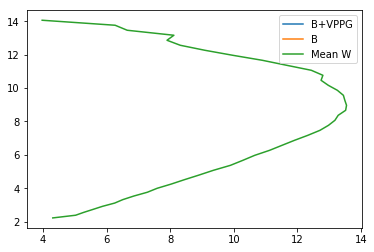

In [9]:
import matplotlib.pyplot as plt
plt.figure;
plt.plot(wint_p,aint_p/1000,label='B+VPPG')
plt.plot(wint_p2,aint_p2/1000,label='B')
plt.plot(prof_p[model],alt_p[model][tf]/1000,label='Mean W')
plt.legend()

[<matplotlib.lines.Line2D object at 0x7f627d83e390>, <matplotlib.lines.Line2D object at 0x7f627d6b1128>, <matplotlib.lines.Line2D object at 0x7f627d6b14a8>, <matplotlib.lines.Line2D object at 0x7f627dcb7278>, <matplotlib.lines.Line2D object at 0x7f627dcb73c8>, <matplotlib.lines.Line2D object at 0x7f627dcb7710>, <matplotlib.lines.Line2D object at 0x7f627dcc9da0>]
['w', 'B$_{SUM}$+VPPG', 'B$_{SUM}$', 'B$_{TH}$', 'B$_{WV}$', 'B$_{CL}$', 'VPPG']


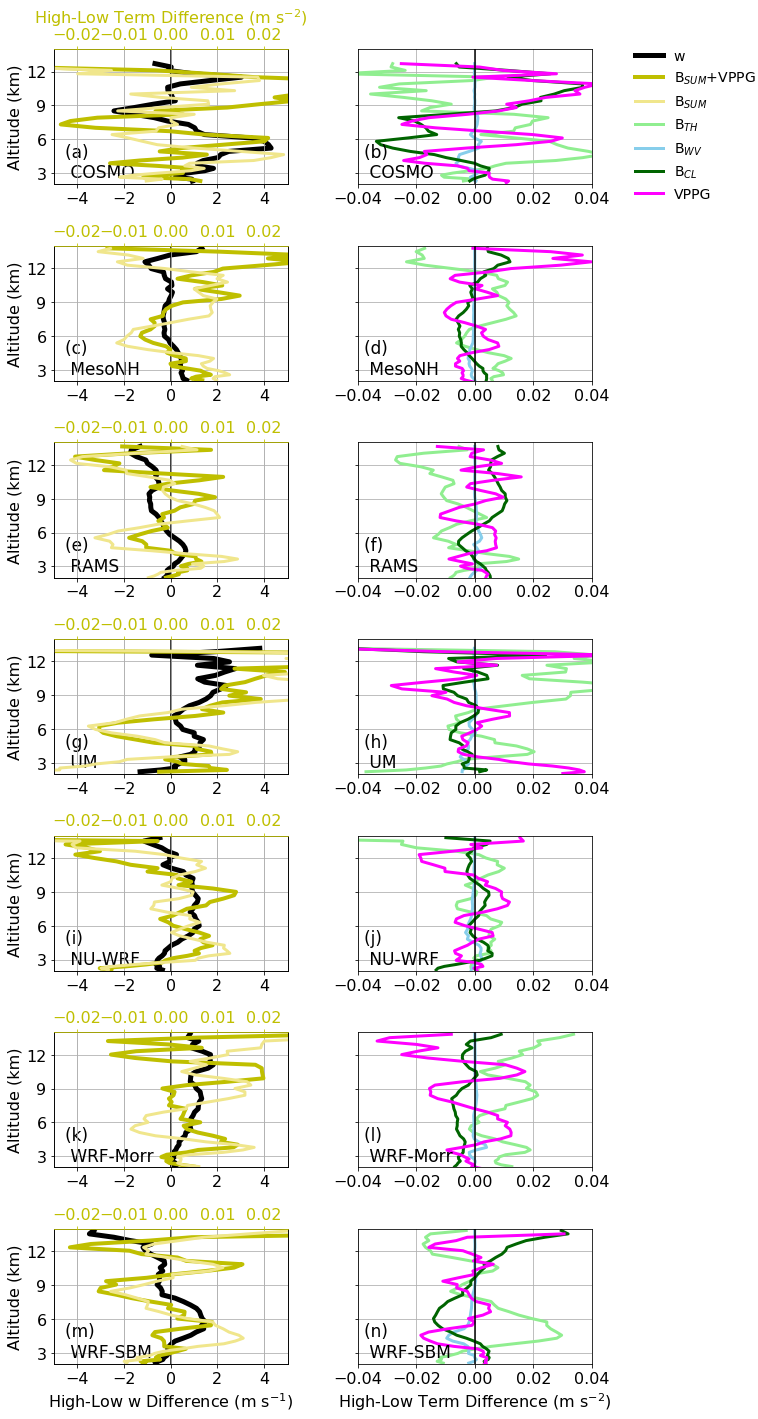

In [29]:

txt0 = ['(a) \n COSMO' , '(c) \n MesoNH', '(e) \n RAMS', '(g) \n UM','(i) \n NU-WRF','(k) \n WRF-Morr','(m) \n WRF-SBM']
txt1 = ['(b) \n COSMO' , '(d) \n MesoNH', '(f) \n RAMS', '(h) \n UM','(j) \n NU-WRF','(l) \n WRF-Morr','(n) \n WRF-SBM']

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
lsize=3
#fig,ax = plt.subplots(7,2,figsize=(9,20))

fig,ax = plt.subplots(7,2,figsize=(11,20))

xlims = [-5,5]
xlimsa = [-0.025,0.025]
xlims1 = [-0.04,0.04]
ylims = [2,14]
yticks = [3,6,9,12]
cntm = 0
for model in models:

    w_pct_dif = (prof_p[model] - prof_c[model])/prof_c[model]*100
    w_dif = (prof_p[model] - prof_c[model])
    t_pct_dif = (profs_p[model] - profs_c[model])/profs_c[model]*100
    t_dif = (profs_p[model] - profs_c[model])
    t_difb = (profb_p[model] - profb_c[model])
    # CLEAN Simulation Plot
    #a = ax[cntm,0].plot(w_pct_dif,alt_c[model][tf]/1000,'--',color=color[model],linewidth=lsize)
    a = ax[cntm,0].plot(w_dif,alt_c[model][tf]/1000,'-',color='k',linewidth=lsize+2,label='w')
    ax[cntm,0].plot([0,0],[0,14],'-k')
    ax[cntm,0].set_xlim(xlims)
    ax[cntm,0].set_xticks([-4,-2,0,2,4])
    ax[cntm,0].set_ylim(ylims)
    ax[cntm,0].set_ylabel('Altitude (km)')
    ax[cntm,0].set_yticks(yticks)
    ax[cntm,0].grid()
    ax2 = plt.twiny(ax[cntm,0])
    b = ax2.plot(t_dif,alt_c[model][tf]/1000,'-',color='y',linewidth=lsize+1,label='B$_{SUM}$+VPPG')
    c = ax2.plot(t_difb,alt_c[model][tf]/1000,'-',color='khaki',linewidth=lsize,label='B$_{SUM}$')
    ax2.set_xlim(xlimsa)
    ax2.set_xticks([-0.02,-0.01,0,0.01,0.02])
    ax2.set_ylim(ylims)
    ax2.set_yticks(yticks)
#    ax2.spines['bottom'].set_color('y')
    ax2.spines['top'].set_color('y')
    ax2.xaxis.label.set_color('y')
    ax2.tick_params(axis='x', colors='y')
    ax2.grid()

    ax[cntm,0].text(-4.5,2.6,txt0[cntm],fontsize=17)

    if cntm == 0:
        ax2.set_xlabel('High-Low Term Difference (m s$^{-2}$)')
    elif cntm == 6:
        ax[cntm,0].set_xlabel('High-Low w Difference (m s$^{-1}$)')

#    ax[0].set_yticks(yticks)
#    ax[0].grid()
#    ax[0].set_ylabel('Altitude (km AGL)')
#    ax[0].set_title(titlename)
#        ax[0,cntm].set_title(pn[model][0]+' '+mn[model][0]+' Low')
#        ax[0,cntm].set_xticks(xticks)
#        ax[0,cntm].set_xticklabels('')


#        dif = (np.abs(prof_p[model])-np.abs(prof_c[model]))
#        dif[(prof_p[model]*prof_c[model])<0] = np.nan


    c1 = 'lightgreen'
    c2 = 'skyblue'
    c3 = 'darkgreen'
    c4 = 'magenta'
    
    lns1 = ax[cntm,1].plot(prof1_p[model]-prof1_c[model],alt_c[model][tf]/1000,color=c1,ls='-',linewidth=lsize,label='B$_{TH}$')
    lns2 = ax[cntm,1].plot(prof2_p[model]-prof2_c[model],alt_c[model][tf]/1000,color=c2,ls='-',linewidth=lsize,label='B$_{WV}$')
    lns3 = ax[cntm,1].plot(prof3_p[model]-prof3_c[model],alt_c[model][tf]/1000,color=c3,ls='-',linewidth=lsize,label='B$_{CL}$')
    lns4 = ax[cntm,1].plot(prof4_p[model]-prof4_c[model],alt_c[model][tf]/1000,color=c4,ls='-',linewidth=lsize,label='VPPG')
    ax[cntm,1].plot([0,0],[0,14],'-k')
    ax[cntm,1].set_xlim(xlims1)
    ax[cntm,1].set_ylim(ylims)
    ax[cntm,1].set_yticks(yticks)
    ax[cntm,1].set_yticklabels('')
    ax[cntm,1].grid()
    if cntm == 6:
        ax[cntm,1].set_xlabel('High-Low Term Difference (m s$^{-2}$)')

        
    ax[cntm,1].text(-0.038,2.6,txt1[cntm],fontsize=17)

    #ax[1].plot([-0.2,0.2],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=color[model],lw=hline_size)     
    #ax[1].plot([-0.2,0.2],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=color[model],lw=hline_size)     
#    ax[1].set_ylim(ylims)
#    ax[1].set_xlim(xlims1)
#    ax[1].set_yticks(yticks)
#    ax[1].grid()
#    ax[1].set_title('(b) High - Low')
#    ax[1].set_xlabel('Difference (m s$^{-2}$)')
#    ax[1].set_yticklabels('')

#    ax[0].plot([0,0],[2,14],'-k',lw=3)
#    ax[1].plot([0,0],[2,14],'-k',lw=3)

    cntm = cntm +1

plt.tight_layout()

#fig.subplots_adjust(right=0.94)
fig.subplots_adjust(right=0.76,wspace=0.3)

#cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])

print(a)
print(lns1)

lns = a+b+c+lns1+lns2+lns3+lns4
print(lns)
labs = [l.get_label() for l in lns]
print(labs)
#fig.legend(lns, labs, bbox_to_anchor=(1.19, 0.96),fontsize=14,frameon=False)
fig.legend(lns, labs, bbox_to_anchor=(0.97, 0.96),fontsize=14,frameon=False)

#cbar2 = fig.colorbar(a, cax=cbar_ax)            
#cbar2.set_ticks(tick_levels2)                        
#cbar2.ax.tick_params(labelsize=fs2) 
#cbar2.ax.set_ylabel('Difference (m s$^{-2}$)',fontsize=fs2)                           
plt.savefig(plot_dir+'ProfxAllModels_'+tf+str(thresh)+'_Apr196km.pdf')
plt.savefig(plot_dir+'ProfxAllModels_'+tf+str(thresh)+'_Apr196km.png')


In [211]:

txt0 = ['(a) \n COSMO' , '(c) \n MesoNH', '(e) \n RAMS', '(g) \n UM','(i) \n NU-WRF','(k) \n WRF-Morr','(m) \n WRF-SBM']
txt1 = ['(b) COSMO' , '(d) MesoNH', '(f) RAMS', '(h) UM','(j) NU-WRF','(l) WRF-Morr','(n) WRF-SBM']

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
lsize=3
fig,ax = plt.subplots(7,2,figsize=(9,20))
xlims = [-0.7,0.7]
xlimsa = [-0.025,0.025]
xlims1 = [-0.04,0.04]
ylims = [2,14]
yticks = [3,6,9,12]
cntm = 0
for model in models:

    w_pct_dif = (prof_p[model] - prof_c[model])/prof_c[model]*100
    w_dif = (prof_p[model] - prof_c[model])
    t_pct_dif = (profs_p[model] - profs_c[model])/profs_c[model]*100
    t_dif = (profs_p[model] - profs_c[model])
    t_difb = (profb_p[model] - profb_c[model])
    # CLEAN Simulation Plot
    #a = ax[cntm,0].plot(w_pct_dif,alt_c[model][tf]/1000,'--',color=color[model],linewidth=lsize)
    if model == 'UM_LEEDS' or model == 'COSMO_KIT':
        a = ax[cntm,0].plot(-np.diff(w_dif),alt_c[model][tf][:-1]/1000,'-',color='k',linewidth=lsize+2,label='w')
    else:
        a = ax[cntm,0].plot(np.diff(w_dif),alt_c[model][tf][:-1]/1000,'-',color='k',linewidth=lsize+2,label='w')
    ax[cntm,0].plot([0,0],[0,14],'-k')
    ax[cntm,0].set_xlim(xlims)
    ax[cntm,0].set_ylim(ylims)
    ax[cntm,0].set_ylabel('Altitude (km)')
    ax[cntm,0].set_yticks(yticks)
    ax[cntm,0].grid()
    ax2 = plt.twiny(ax[cntm,0])
    b = ax2.plot(t_dif,alt_c[model][tf]/1000,'-',color='y',linewidth=lsize+1,label='B$_{SUM}$+VPPG')
    c = ax2.plot(t_difb,alt_c[model][tf]/1000,'-',color='khaki',linewidth=lsize,label='B$_{SUM}$')
    ax2.set_xlim(xlimsa)
    ax2.set_ylim(ylims)
    ax2.set_yticks(yticks)
    ax2.grid()

    ax[cntm,0].text(-4.5,3,txt0[cntm],fontsize=20)

    if cntm == 0:
        ax2.set_xlabel('High-Low Term Difference (m s$^{-2}$)')
    elif cntm == 6:
        ax[cntm,0].set_xlabel('High-Low w Difference (m s$^{-1}$)')

#    ax[0].set_yticks(yticks)
#    ax[0].grid()
#    ax[0].set_ylabel('Altitude (km AGL)')
#    ax[0].set_title(titlename)
#        ax[0,cntm].set_title(pn[model][0]+' '+mn[model][0]+' Low')
#        ax[0,cntm].set_xticks(xticks)
#        ax[0,cntm].set_xticklabels('')

#        dif = (np.abs(prof_p[model])-np.abs(prof_c[model]))
#        dif[(prof_p[model]*prof_c[model])<0] = np.nan

    c1 = 'lightgreen'
    c2 = 'skyblue'
    c3 = 'darkgreen'
    c4 = 'magenta'
    
    lns1 = ax[cntm,1].plot(prof1_p[model]-prof1_c[model],alt_c[model][tf]/1000,color=c1,ls='-',linewidth=lsize,label='B$_{TH}$')
    lns2 = ax[cntm,1].plot(prof2_p[model]-prof2_c[model],alt_c[model][tf]/1000,color=c2,ls='-',linewidth=lsize,label='B$_{WV}$')
    lns3 = ax[cntm,1].plot(prof3_p[model]-prof3_c[model],alt_c[model][tf]/1000,color=c3,ls='-',linewidth=lsize,label='B$_{CL}$')
    lns4 = ax[cntm,1].plot(prof4_p[model]-prof4_c[model],alt_c[model][tf]/1000,color=c4,ls='-',linewidth=lsize,label='VPPG')
    ax[cntm,1].plot([0,0],[0,14],'-k')
    ax[cntm,1].set_xlim(xlims1)
    ax[cntm,1].set_ylim(ylims)
    ax[cntm,1].set_yticks(yticks)
    ax[cntm,1].set_yticklabels('')
    ax[cntm,1].grid()
    if cntm == 6:
        ax[cntm,1].set_xlabel('High-Low Term Difference (m s$^{-2}$)')
    
    #ax[1].plot([-0.2,0.2],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=color[model],lw=hline_size)     
    #ax[1].plot([-0.2,0.2],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=color[model],lw=hline_size)     
#    ax[1].set_ylim(ylims)
#    ax[1].set_xlim(xlims1)
#    ax[1].set_yticks(yticks)
#    ax[1].grid()
#    ax[1].set_title('(b) High - Low')
#    ax[1].set_xlabel('Difference (m s$^{-2}$)')
#    ax[1].set_yticklabels('')

#    ax[0].plot([0,0],[2,14],'-k',lw=3)
#    ax[1].plot([0,0],[2,14],'-k',lw=3)

    cntm = cntm +1

plt.tight_layout()

fig.subplots_adjust(right=0.95)
#cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])

print(a)
print(lns1)

lns = a+b+c+lns1+lns2+lns3+lns4
print(lns)
labs = [l.get_label() for l in lns]
print(labs)
fig.legend(lns, labs, bbox_to_anchor=(1.19, 0.96),fontsize=14)

#cbar2 = fig.colorbar(a, cax=cbar_ax)            
#cbar2.set_ticks(tick_levels2)                        
#cbar2.ax.tick_params(labelsize=fs2) 
#cbar2.ax.set_ylabel('Difference (m s$^{-2}$)',fontsize=fs2)                           
#plt.savefig(plot_dir+'ProfxAllModels_'+tf+str(thresh)+'_Apr196km.pdf')


COSMO_KIT [-0.29999924 -0.30000114 -0.29999924 -0.30000114 -0.29999924 -0.29999924
 -0.30000114 -0.29999924 -0.30000114 -0.29999924 -0.29999924 -0.30000114
 -0.29999924 -0.30000114 -0.29999733 -0.29999924 -0.30000114 -0.29999924
 -0.29999924 -0.30000114 -0.3000002  -0.29999924 -0.3000002  -0.3000002
 -0.3000002  -0.3000002  -0.29999924 -0.3000002  -0.3000002  -0.3000002
 -0.3000002  -0.29999924 -0.3000002  -0.3000002  -0.2997322  -0.29943752
 -0.29941654 -0.29941368 -0.29941368 -0.29941654 -0.29941368 -0.29941654
 -0.29941368 -0.2994156  -0.29941463 -0.2994151  -0.2994151  -0.29941368
 -0.2994156  -0.29941463 -0.2994151  -0.2994151  -0.29941463 -0.29941463
 -0.30007458 -0.29507685 -0.2823038  -0.26863146 -0.25583458 -0.24365187
 -0.23205161 -0.22099805 -0.21047354 -0.20045853 -0.19091201 -0.18181443
 -0.1731565  -0.1649127  -0.15706325 -0.14958262 -0.14246178 -0.13567984
 -0.12921238 -0.12305939 -0.11720109 -0.11162162 -0.10630727 -0.10124218
 -0.09642178 -0.09183049 -0.08745903 -0.083

COSMO_KIT 0.3833241564915702 0.2257157946927492
MesoNH_Toulouse 0.025870131119684888 0.2129608345252915
RAMS_CSU 0.5418078223012086 0.25890386988125863
UM_LEEDS 0.419436361052863 0.08457220297682007
WRF_NASA 0.18882812839078714 -0.38972536487347353
WRF_OXF 0.43710999774240106 -0.4025374977966775
WRF_PNNL 0.17796702818288374 0.3439077574186957


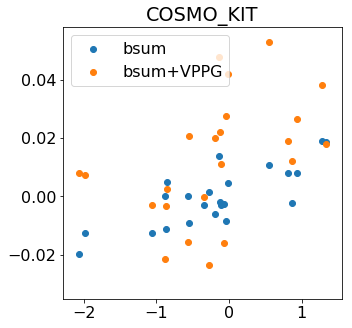

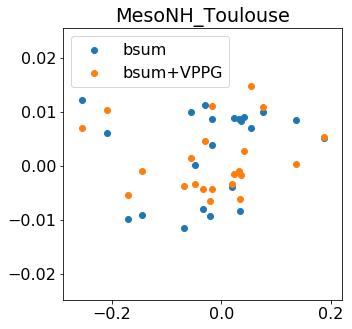

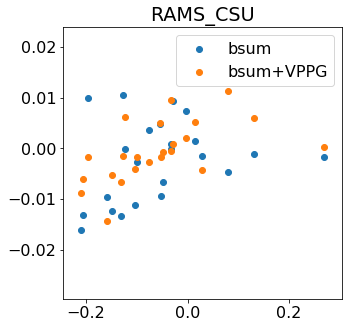

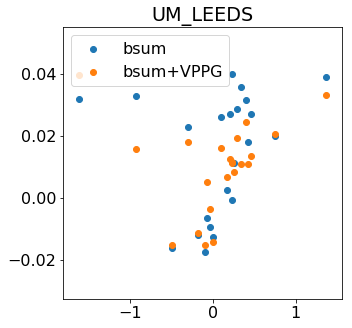

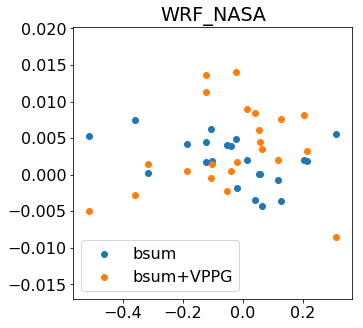

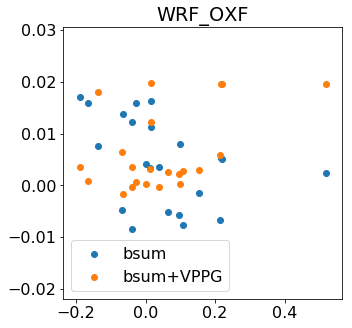

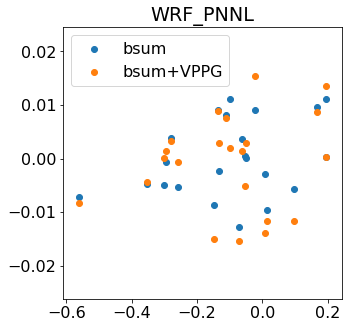

In [229]:
import numpy.ma as ma
corrb = np.zeros(7)
corrs = np.zeros(7)
cntm = 0
for model in models:
    
    w_pct_dif = (prof_p[model] - prof_c[model])/prof_c[model]*100
    w_dif = (prof_p[model] - prof_c[model])
    t_pct_dif = (profs_p[model] - profs_c[model])/profs_c[model]*100
    t_dif = (profs_p[model] - profs_c[model])
    t_difb = (profb_p[model] - profb_c[model])
    
    ids1 = np.argmin(np.abs(alt_c[model][tf]/1000 - 5.0))
    ids2 = np.argmin(np.abs(alt_c[model][tf]/1000 - 12.0))
    
    id11 = np.min([ids1,ids2])
    id22 = np.max([ids1,ids2]) 
    
    w_dif = w_dif[id11:id22]
    t_dif = t_dif[id11:id22]
    t_difb = t_difb[id11:id22]
    
    if model == 'UM_LEEDS' or model == 'COSMO_KIT':
#        a=ma.masked_invalid(-np.diff(w_dif))
#        b=ma.masked_invalid(t_dif[:-1])
#        msk = (~a.mask & ~b.mask)        
        corrs[cntm] = np.corrcoef(-np.diff(w_dif),t_dif[1:])[0,1]
        
#        print(np.corrcoef(-np.diff(w_dif)[msk],t_dif[1:][msk]))
#        a=ma.masked_invalid(-np.diff(w_dif))
#        b=ma.masked_invalid(t_difb[:-1])
#        msk = (~a.mask & ~b.mask)        
        corrb[cntm] = np.corrcoef(-np.diff(w_dif),t_difb[1:])[0,1]

        fig = plt.figure(figsize=(5,5));
        plt.scatter(-np.diff(w_dif),t_difb[:-1],label='bsum')
        plt.scatter(-np.diff(w_dif),t_dif[:-1],label='bsum+VPPG')
        plt.title(model)
        plt.legend()                
        
        
    else:
#        a=ma.masked_invalid(np.diff(w_dif))
#        b=ma.masked_invalid(t_dif[:-1])
#        msk = (~a.mask & ~b.mask)        
        corrs[cntm] = np.corrcoef(np.diff(w_dif),t_dif[:-1])[0,1]

#        a=ma.masked_invalid(np.diff(w_dif))
#        b=ma.masked_invalid(t_difb[:-1])
#        msk = (~a.mask & ~b.mask)        
        corrb[cntm] = np.corrcoef(np.diff(w_dif),t_difb[:-1])[0,1]

        fig = plt.figure(figsize=(5,5));
        plt.scatter(np.diff(w_dif),t_difb[:-1],label='bsum')
        plt.scatter(np.diff(w_dif),t_dif[:-1],label='bsum+VPPG')
        plt.title(model)
        plt.legend()        

        
    print(model,corrs[cntm],corrb[cntm])

    cntm = cntm + 1

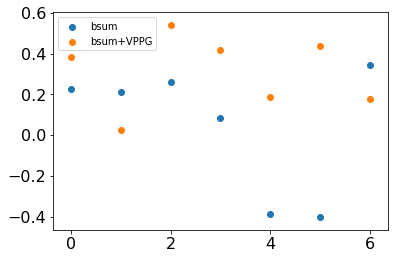

In [230]:
plt.figure;
plt.scatter(np.arange(0,7),corrb,label='bsum')
plt.scatter(np.arange(0,7),corrs,label='bsum+VPPG')
plt.legend(fontsize = 10)

In [231]:
print(a)

[-0.012989165295976157 -0.022574172093356104 0.061341490048024916
 0.10202823973458042 0.1567503485211521 0.34019514014241636
 0.3308576652814974 0.22678666070886067 0.32434725638511885
 -0.09868933001829916 0.16702576714714468 -0.13717588350043286
 -0.06151449780448104 -0.04960982530004898 -0.13290597501797485
 -0.2592394886045817 -0.30179710178240526 -0.35395209364022406
 -0.5604591723910772 0.014833726689172266 -0.07204371308211144
 -0.14865845369969932 0.09732742157176766 0.007467160037480269
 -0.05461908223922762 0.1932974046812852 -0.1105165277634228
 0.19476444608056376 -0.02349639503696821 -0.27901418085665775
 -0.2943627002547]


[<matplotlib.lines.Line2D object at 0x7f9bc66d3080>, <matplotlib.lines.Line2D object at 0x7f9bc66e70b8>]
['B$_{TH}$', 'B$_{CL}$']


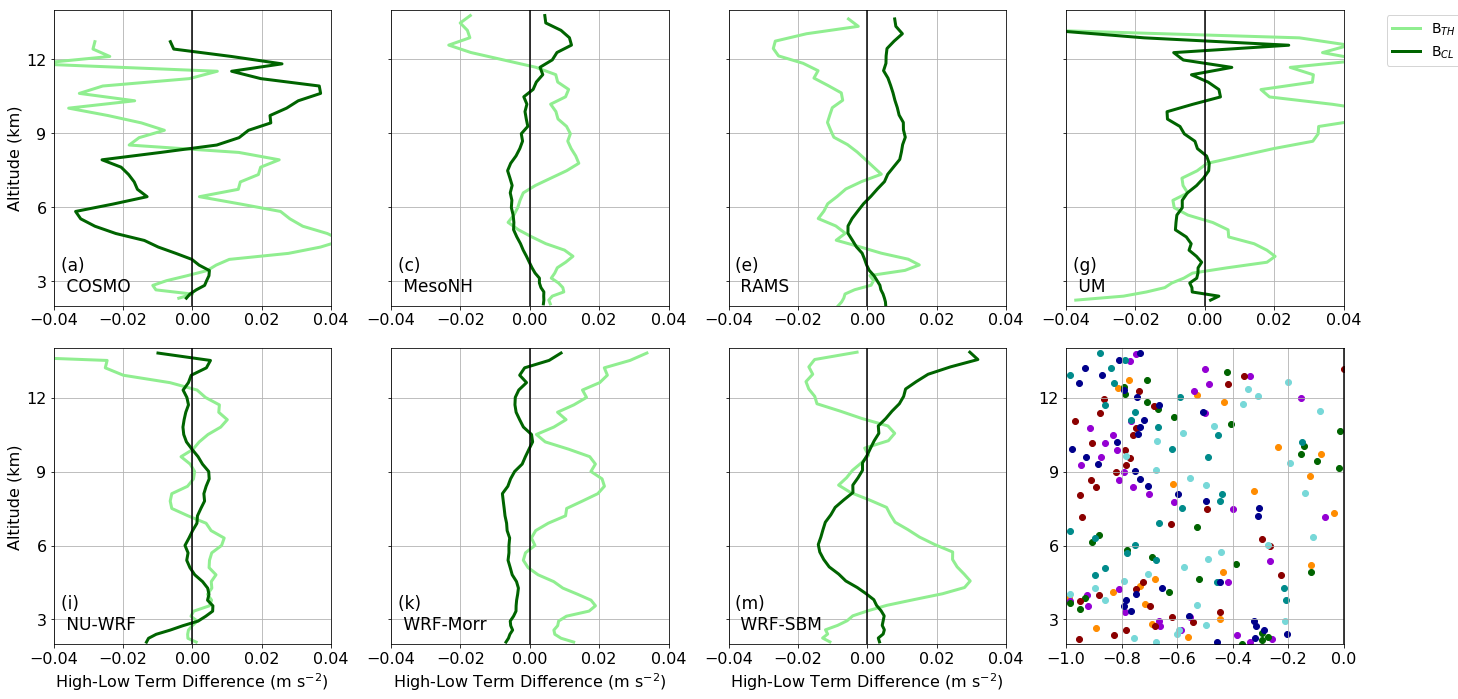

In [26]:


pctdifarr = np.zeros((7,24))
txt0 = ['(a) \n COSMO' , '(c) \n MesoNH', '(e) \n RAMS', '(g) \n UM','(i) \n NU-WRF','(k) \n WRF-Morr','(m) \n WRF-SBM']

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
lsize=3
fig,ax = plt.subplots(2,4,figsize=(20,10))
xlims = [-5,5]
xlimsa = [-0.025,0.025]
xlims1 = [-0.04,0.04]
ylims = [2,14]
yticks = [3,6,9,12]
cntm = 0; cntn = 0; cnt = 0;
for model in models:

    c1 = 'lightgreen'
    c2 = 'skyblue'
    c3 = 'darkgreen'
    c4 = 'magenta'
    
    lns1 = ax[cntm,cntn].plot(prof1_p[model]-prof1_c[model],alt_c[model][tf]/1000,color=c1,ls='-',linewidth=lsize,label='B$_{TH}$')
    lns3 = ax[cntm,cntn].plot(prof3_p[model]-prof3_c[model],alt_c[model][tf]/1000,color=c3,ls='-',linewidth=lsize,label='B$_{CL}$')
    ax[cntm,cntn].plot([0,0],[0,14],'-k')
    ax[cntm,cntn].set_xlim(xlims1)
    ax[cntm,cntn].set_ylim(ylims)
    ax[cntm,cntn].set_yticks(yticks)
    ax[cntm,cntn].grid()

    if cntm == 1:
        ax[cntm,cntn].set_xlabel('High-Low Term Difference (m s$^{-2}$)')

    if cntn == 0:
        ax[cntm,cntn].set_ylabel('Altitude (km)')
    else:
        ax[cntm,cntn].set_yticklabels('')

        
    ax[cntm,cntn].text(-0.038,2.6,txt0[cnt],fontsize=17)

    cl_dif = np.abs(prof3_p[model]-prof3_c[model])
    bt_dif = np.abs(prof1_p[model]-prof1_c[model])
    pct_diff = (cl_dif-bt_dif)/bt_dif
    ax[1,3].scatter(pct_diff,alt_c[model][tf]/1000,c=color[model],label=model)

    alts1 = np.arange(2,14,0.5)
    for aa in np.arange(0,len(alts1)):
        altid = np.abs(alt_c[model][tf]/1000 - alts1[aa]).argmin()
        pctdifarr[cnt,aa] = pct_diff[altid]        
    
    
    cnt = cnt + 1
    cntn = cntn +1
    if cntn == 4:
        cntm = 1
        cntn = 0

        
ax[1,3].plot([0,0],[0,14],'-k')
ax[1,3].set_xlim([-1,0])
ax[1,3].set_ylim(ylims)
ax[1,3].set_yticks(yticks)
ax[1,3].grid()
#ax[1,3].legend()

plt.tight_layout()

fig.subplots_adjust(right=0.94)
#cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])

lns = lns1+lns3
print(lns)
labs = [l.get_label() for l in lns]
print(labs)
fig.legend(lns, labs, bbox_to_anchor=(1.02, 0.96),fontsize=14)

#cbar2 = fig.colorbar(a, cax=cbar_ax)            
#cbar2.set_ticks(tick_levels2)                        
#cbar2.ax.tick_params(labelsize=fs2) 
#cbar2.ax.set_ylabel('Difference (m s$^{-2}$)',fontsize=fs2)                           
#plt.savefig(plot_dir+'ProfxAllModels_'+tf+str(thresh)+'_Apr196km.pdf')


In [23]:
np.nanmedian(pctdifarr,axis=1)

array([ 0.13569261, -0.54340246, -0.21697356, -0.74097888, -0.58865869,
       -0.70593088, -0.30801037])